# k-stat

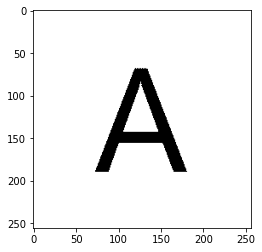

In [8]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

In [9]:
from optimize import optimize_sa1

K = 10
ks = [i for i in range(2, K + 1)]
result = []
for i in ks:
    result.append(optimize_sa1(k=i, ws=25, wc=1))
    print(f"{i}/{K} done.")

2/10 done.
3/10 done.
4/10 done.
5/10 done.
6/10 done.
7/10 done.
8/10 done.
9/10 done.
10/10 done.


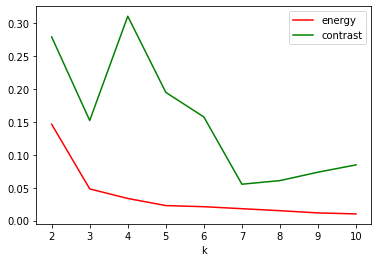

In [10]:
from optimize import energy

plt.xlabel("k")
plt.plot(ks, list(map(lambda x: energy(x.variables, ws=25, wc=1), result)), label="energy", color="red")
plt.plot(ks, list(map(lambda x: x.contrast, result)), label="contrast", color="green")
plt.legend()

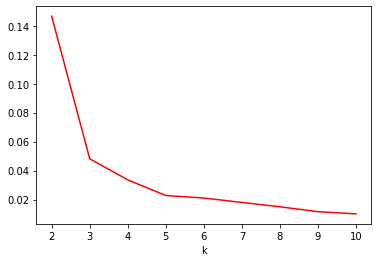

In [11]:
plt.xlabel("k")
plt.plot(ks, list(map(lambda x: energy(x.variables, ws=25, wc=1), result)), label="energy", color="red")


In [12]:
from optimize import safety_penalty_list
import pandas as pd

df = pd.DataFrame({
    "k": ks,
    "contrast": list(map(lambda x: x.contrast, result)),
    "safety": list(map(lambda x: sum(safety_penalty_list(x.variables)), result))
})
df

,k,contrast,safety
0,2,0.279464,0.036279
1,3,0.152308,0.086561
2,4,0.310952,0.330226
3,5,0.195062,0.302781
4,6,0.157667,0.259804
5,7,0.055281,0.082763
6,8,0.060769,0.122350
7,9,0.073596,0.213533
8,10,0.084692,0.296598
